In [837]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

red_circle = dict(markerfacecolor='r', marker='o')
meanlineprops = dict(linestyle='--', linewidth=2, color='green')
medianprops = dict(linestyle='dotted', linewidth=2, color='blue')
boxprops=dict(facecolor='yellow', color='yellow')

## Importing data


In [3]:
required_df = pd.read_csv("/Users/jxxt/verzeo/winequality-red.csv")

FileNotFoundError: [Errno 2] File /Users/jxxt/verzeo/winequality-red.csv does not exist: '/Users/jxxt/verzeo/winequality-red.csv'

In [840]:
required_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


 Input variables (based on physicochemical tests):
 <ol>
   <li> <b>fixed acidity (tartaric acid - g / dm^3)</b> :Most acids involved with wine or fixed or nonvolatile (do not evaporate readily)</li>
   <li> <b>volatile acidity (acetic acid - g / dm^3)</b> :The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste</li>
   <li> <b>citric acid (g / dm^3)</b> : Found in small quantities, citric acid can add ‘freshness’ and flavor to wines</li>
   <li> <b>residual sugar (g / dm^3) </b>: The amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/litre and wines with greater than 45 grams/litre are considered sweet </li>
   <li> <b>chlorides (sodium chloride - g / dm^3</b>: The amount of salt in the wine </li>
   <li> <b>free sulfur dioxide (mg / dm^3)</b>:The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine </li>
   <li> <b>total sulfur dioxide (mg / dm^3)</b>:Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine</li>
   <li> <b>density (g / cm^3)</b>:The density of water is close to that of water depending on the percent alcohol and sugar content</li>
    <li> <b>pH</b>: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale </li>
   <li> <b>sulphates (potassium sulphate - g / dm3)</b>: A wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant</li>
   <li> <b>alcohol (% by volume)</b>: The percent alcohol content of the wine</li>
 </ol> 
 
 Output variable (based on sensory data): 
  <ul> 
   <li> quality (score between 0 and 10) </li>
  </ul>  

In [841]:
z = np.abs(stats.zscore(required_df))


This z score is used later in Modelling.

***

## Dropping rows containing Null Values (if any)

In [842]:
required_df.dropna()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<p> There are <u><b>no null values</b></u> in this dataset </p>

***

## Performing Exploratory Data Analysis

### 1) Univariate Analysis


#### Fixed Acidity

In [1]:
fixed_acidity = required_df["fixed acidity"];
x_label = "Fixed Acidity in  g / dm^3"
y_label = "Counts"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(fixed_acidity,vert = False,notch = True, meanline = True,showmeans = True, flierprops=red_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops, boxprops = boxprops, patch_artist = True )
ax2.hist(fixed_acidity,bins = range(4,16),facecolor = 'yellow',edgecolor = "gray")
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)

print("Consider Fixed Acidity,")
print("\t\t Minimum Value :",fixed_acidity.min())
print("\t\t Maximum Value :",fixed_acidity.max())
print("\t\t Mean          :",round(fixed_acidity.mean(),2))
print("\t\t Median        :",fixed_acidity.median())
print("\t\t Std. Deviation:",round(fixed_acidity.std(),2))


NameError: name 'required_df' is not defined

<p> Majority of data points are between 6 and 10. </p>

#### Residual Sugar

Consider Residual Sugar,
		 Minimum Value : 0.9
		 Maximum Value : 15.5
		 Mean          : 2.54
		 Median        : 0.26
		 Std. Deviation: 1.41


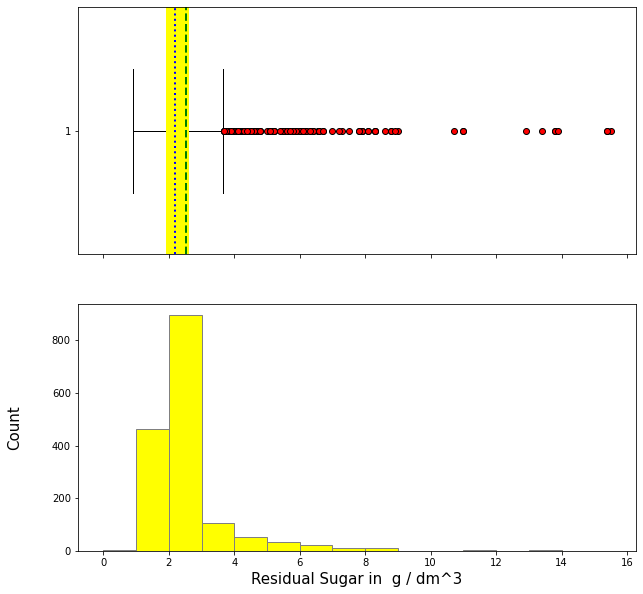

In [844]:
residual_sugar = required_df["residual sugar"];
x_label = "Residual Sugar in  g / dm^3"
y_label = "Count"

plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(residual_sugar,vert = False,meanline = True,boxprops = boxprops, patch_artist = True,showmeans = True, flierprops=red_circle,meanprops = meanlineprops, medianprops =medianprops, widths = 1)
ax2.hist(residual_sugar,bins = range(0,16),facecolor = 'yellow',edgecolor = "gray")
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)

print("Consider Residual Sugar,")
print("\t\t Minimum Value :",residual_sugar.min())
print("\t\t Maximum Value :",residual_sugar.max())
print("\t\t Mean          :",round(residual_sugar.mean(),2))
print("\t\t Median        :",citric_acid.median())
print("\t\t Std. Deviation:",round(residual_sugar.std(),2))


Residual Sugar levels are low. Thus,affirming the bitter taste of red wine.

Consider Chlorides,
		 Minimum Value : 0.012
		 Maximum Value : 0.611
		 Mean          : 0.09
		 Median        : 0.079
		 Std. Deviation: 0.05


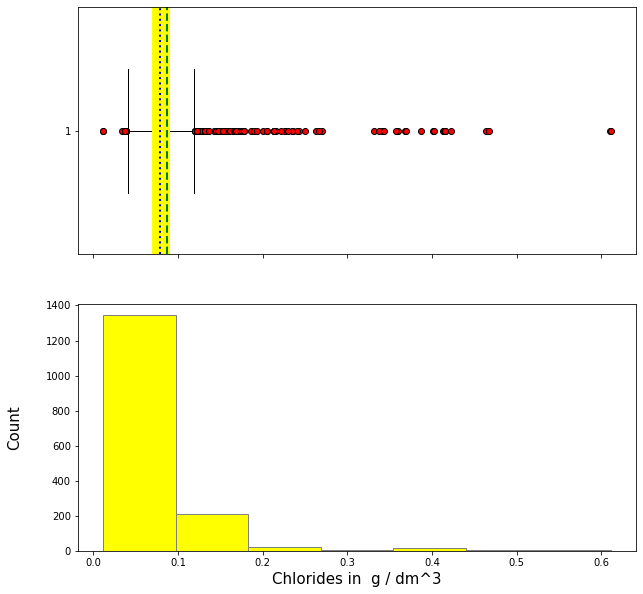

In [845]:
chlorides = required_df["chlorides"]
x_label = "Chlorides in  g / dm^3"
y_label = "Count"

plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(chlorides,vert = False,meanline = True,boxprops = boxprops, patch_artist = True,showmeans = True, flierprops=red_circle,meanprops = meanlineprops, medianprops =medianprops, widths = 1)
ax2.hist(chlorides,bins = 7,facecolor = 'yellow',edgecolor = "gray")
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)
print("Consider Chlorides,")
print("\t\t Minimum Value :",chlorides.min())
print("\t\t Maximum Value :",chlorides.max())
print("\t\t Mean          :",round(chlorides.mean(),2))
print("\t\t Median        :",chlorides.median())
print("\t\t Std. Deviation:",round(chlorides.std(),2))


Mnute quantity of salt is present in Red Wine.



Consider Citric Acid,
		 Minimum Value : 0.0
		 Maximum Value : 1.0
		 Mean          : 0.27
		 Median        : 0.26
		 Std. Deviation: 0.19


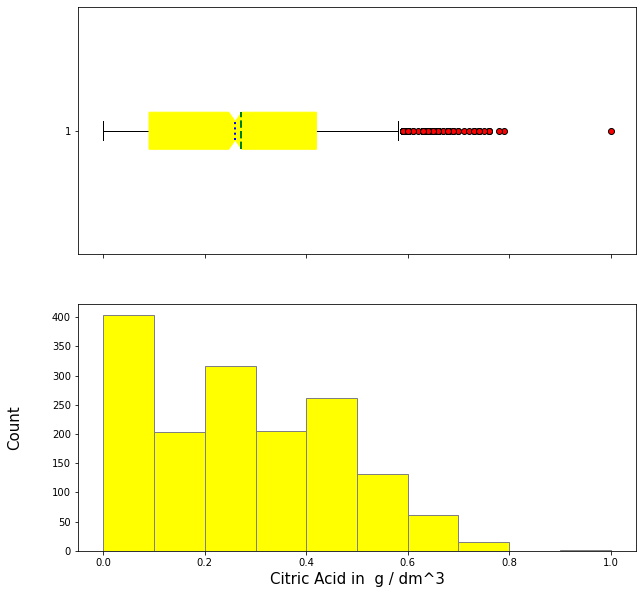

In [846]:
citric_acid = required_df["citric acid"];
x_label = "Citric Acid in  g / dm^3"
y_label = "Count"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(citric_acid,vert = False,notch = True,boxprops = boxprops, patch_artist = True ,meanline = True,showmeans = True, flierprops=red_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops)
ax2.hist(citric_acid,facecolor = 'yellow',edgecolor = "gray")
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)
print("Consider Citric Acid,")
print("\t\t Minimum Value :",citric_acid.min())
print("\t\t Maximum Value :",citric_acid.max())
print("\t\t Mean          :",round(citric_acid.mean(),2))
print("\t\t Median        :",citric_acid.median())
print("\t\t Std. Deviation:",round(citric_acid.std(),2))


Critic acid levels oberved in red wine are predominantly below 0.6

#### Quality - Understanding our target variable

Consider Quality,
		 Minimum Value : 3
		 Maximum Value : 8
		 Mean          : 5.64
		 Median        : 6.0
		 Std. Deviation: 0.81


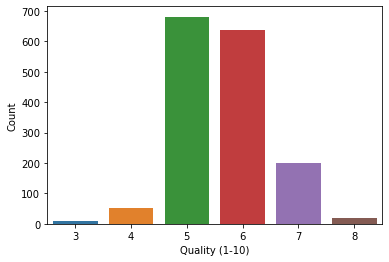

In [847]:
quality = required_df["quality"]
x_label = "Quality (1-10)"
y_label = "Count"

fig = sns.countplot(x = quality,data= required_df)
fig.set(xlabel=x_label,ylabel=y_label)
print("Consider Quality,")
print("\t\t Minimum Value :",quality.min())
print("\t\t Maximum Value :",quality.max())
print("\t\t Mean          :",round(quality.mean(),2))
print("\t\t Median        :",quality.median())
print("\t\t Std. Deviation:",round(quality.std(),2))


Our target variable is categorical and commonly observed values are between 5,6 & 7 while only several values lie at 3 & 8. There is not a single wine that's rated >=9. Let's divide our target variable into 3 categories (good-average-bad).

#### Alcohol

Consider Alcohol,
		 Minimum Value : 8.4
		 Maximum Value : 14.9
		 Mean          : 10.42
		 Median        : 10.2
		 Std. Deviation: 1.07


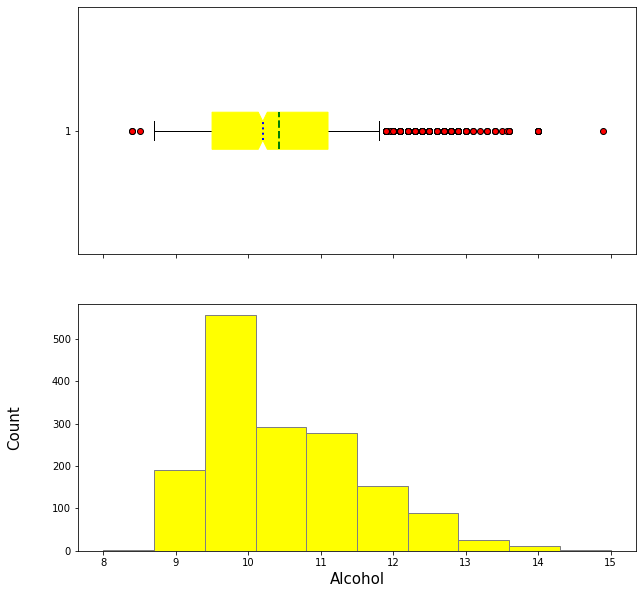

In [848]:
alcohol = required_df["alcohol"];
x_label = "Alcohol"
y_label = "Count"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(alcohol,vert = False,notch = True,boxprops = boxprops, patch_artist = True ,meanline = True,showmeans = True, flierprops=red_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops)
ax2.hist(alcohol,facecolor = 'yellow',edgecolor = "gray", range =(8,15))
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)
print("Consider Alcohol,")
print("\t\t Minimum Value :",alcohol.min())
print("\t\t Maximum Value :",alcohol.max())
print("\t\t Mean          :",round(alcohol.mean(),2))
print("\t\t Median        :",alcohol.median())
print("\t\t Std. Deviation:",round(alcohol.std(),2))


Alcohol content in Red Wine ranges from 8.9 to 14.9 % by volume, making it a light alcoholic drink

#### Free Sulfur Dioxide

Consider Free Sulfur Dioxide,
		 Minimum Value : 1.0
		 Maximum Value : 72.0
		 Mean          : 15.87
		 Median        : 14.0
		 Std. Deviation: 10.46


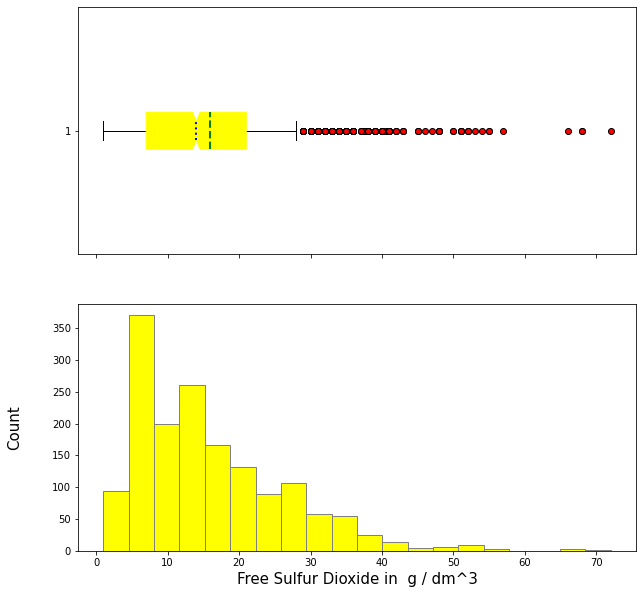

In [849]:
free_so2 = required_df["free sulfur dioxide"];
x_label = "Free Sulfur Dioxide in  g / dm^3"
y_label = "Count"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(free_so2,vert = False,notch = True,boxprops = boxprops, patch_artist = True ,meanline = True,showmeans = True, flierprops=red_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops)
ax2.hist(free_so2,facecolor = 'yellow',edgecolor = "gray", bins = 20)
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)
print("Consider Free Sulfur Dioxide,")
print("\t\t Minimum Value :",free_so2.min())
print("\t\t Maximum Value :",free_so2.max())
print("\t\t Mean          :",round(free_so2.mean(),2))
print("\t\t Median        :",free_so2.median())
print("\t\t Std. Deviation:",round(free_so2.std(),2))


#### Total Surlfur Dioxide

Consider Total Sulfur Dioxide,
		 Minimum Value : 6.0
		 Maximum Value : 289.0
		 Mean          : 46.47
		 Median        : 38.0
		 Std. Deviation: 32.9


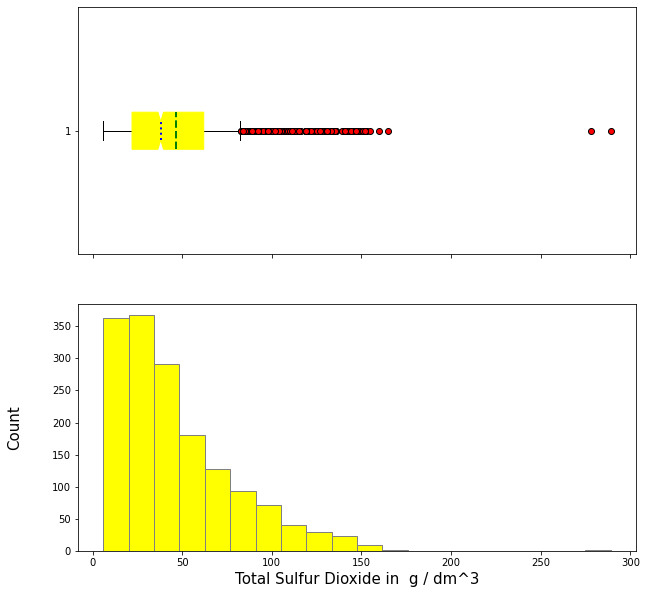

In [850]:
total_so2 = required_df["total sulfur dioxide"];
x_label = "Total Sulfur Dioxide in  g / dm^3"
y_label = "Count"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(total_so2,vert = False,notch = True,boxprops = boxprops, patch_artist = True ,meanline = True,showmeans = True, flierprops=red_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops, )
ax2.hist(total_so2,facecolor = 'yellow',edgecolor = "gray", bins = 20)
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)
print("Consider Total Sulfur Dioxide,")
print("\t\t Minimum Value :",total_so2.min())
print("\t\t Maximum Value :",total_so2.max())
print("\t\t Mean          :",round(total_so2.mean(),2))
print("\t\t Median        :",total_so2.median())
print("\t\t Std. Deviation:",round(total_so2.std(),2))


Most data is in the range of 20 - 60 g/dm^3

#### Density

Consider Density,
		 Minimum Value : 0.99007
		 Maximum Value : 1.00369
		 Mean          : 1.0
		 Median        : 0.99675
		 Std. Deviation: 0.0


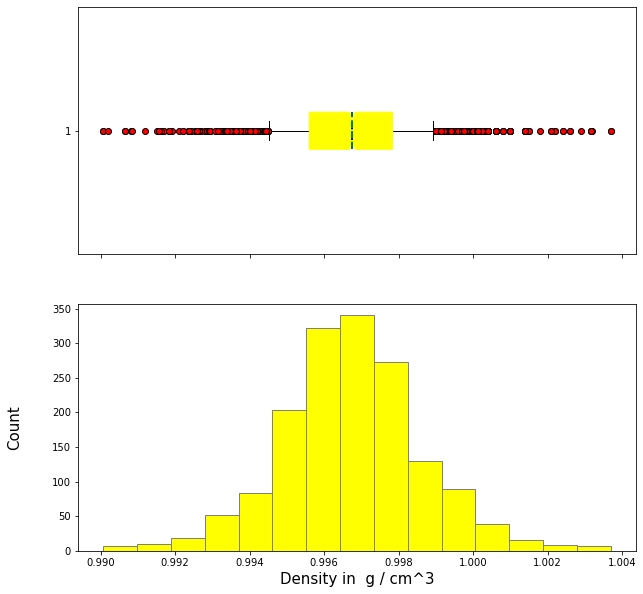

In [851]:
density = required_df["density"];
x_label = "Density in  g / cm^3"
y_label = "Count"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(density,vert = False,notch = True,boxprops = boxprops, patch_artist = True ,meanline = True,showmeans = True, flierprops=red_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops, )
ax2.hist(density,facecolor = 'yellow',edgecolor = "gray",bins = 15)
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax1.yaxis.set_label_coords(-0.1,0.5)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)
print("Consider Density,")
print("\t\t Minimum Value :",density.min())
print("\t\t Maximum Value :",density.max())
print("\t\t Mean          :",round(density.mean(),2))
print("\t\t Median        :",density.median())
print("\t\t Std. Deviation:",round(density.std(),2))


#### pH

Consider pH,
		 Minimum Value : 2.74
		 Maximum Value : 4.01
		 Mean          : 3.31
		 Median        : 3.31
		 Std. Deviation: 0.15


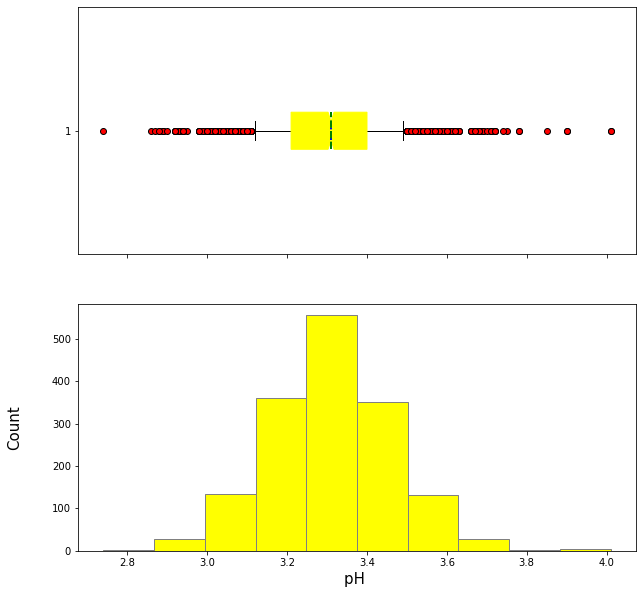

In [852]:
ph = required_df["pH"];
x_label = "pH "
y_label = "Count"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(ph,vert = False,notch = True,boxprops = boxprops, patch_artist = True ,meanline = True,showmeans = True, flierprops=red_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops, )
ax2.hist(ph,facecolor = 'yellow',edgecolor = "gray")
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)
print("Consider pH,")
print("\t\t Minimum Value :",ph.min())
print("\t\t Maximum Value :",ph.max())
print("\t\t Mean          :",round(ph.mean(),2))
print("\t\t Median        :",ph.median())
print("\t\t Std. Deviation:",round(ph.std(),2))


pH of Red Wine is below 7, indicating it's acidic in nature. This is also backed by the presence of sulphates as well.

#### Suphates 

Consider Sulphates,
		 Minimum Value : 0.33
		 Maximum Value : 2.0
		 Mean          : 0.66
		 Median        : 0.62
		 Std. Deviation: 0.17


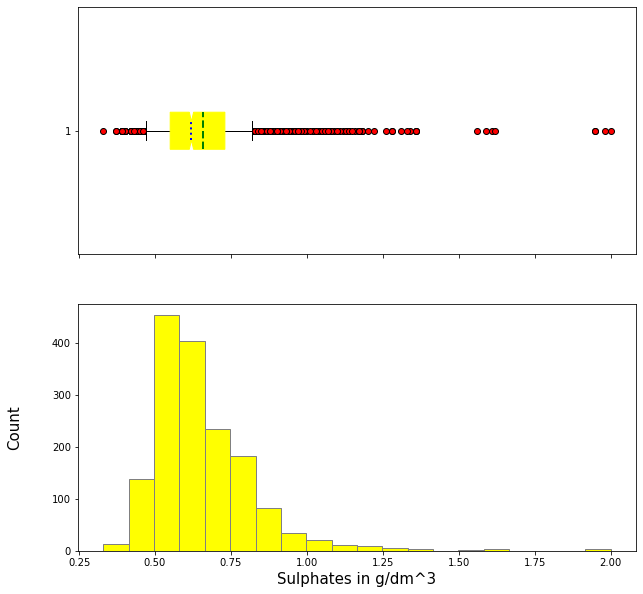

In [853]:
sulphates = required_df["sulphates"];
x_label = "Sulphates in g/dm^3"
y_label = "Count"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(sulphates,vert = False,notch = True,boxprops = boxprops, patch_artist = True ,meanline = True,showmeans = True, flierprops=red_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops, )
ax2.hist(sulphates,facecolor = 'yellow',edgecolor = "gray", bins = 20)
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)
print("Consider Sulphates,")
print("\t\t Minimum Value :",sulphates.min())
print("\t\t Maximum Value :",sulphates.max())
print("\t\t Mean          :",round(sulphates.mean(),2))
print("\t\t Median        :",sulphates.median())
print("\t\t Std. Deviation:",round(sulphates.std(),2))


Presense of sulphates barely goes above 1 g/dm^3

#### Volatile Acidity

Consider Volatile Acidity in g/dm^3,
		 Minimum Value : 0.12
		 Maximum Value : 1.58
		 Mean          : 0.53
		 Median        : 0.52
		 Std. Deviation: 0.18


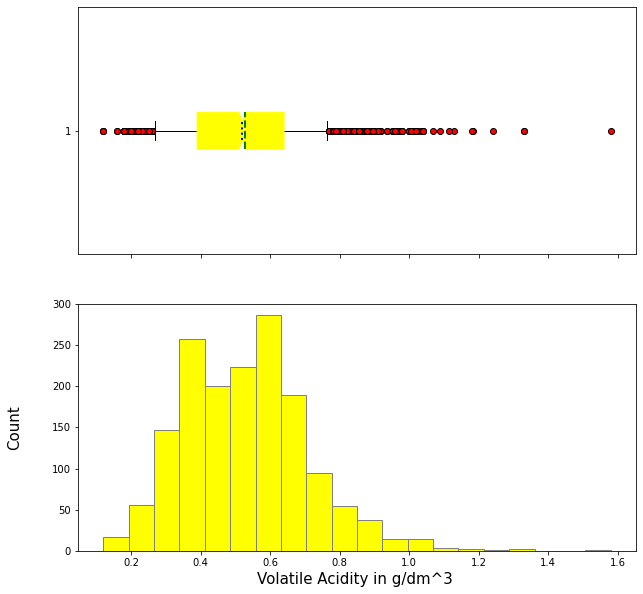

In [854]:
volatile_acidity = required_df["volatile acidity"];
x_label = "Volatile Acidity in g/dm^3 "
y_label = "Count"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(volatile_acidity,vert = False,notch = True,boxprops = boxprops, patch_artist = True ,meanline = True,showmeans = True, flierprops=red_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops, )
ax2.hist(volatile_acidity,facecolor = 'yellow',edgecolor = "gray", bins = 20)
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)
print("Consider Volatile Acidity in g/dm^3,")
print("\t\t Minimum Value :",volatile_acidity.min())
print("\t\t Maximum Value :",volatile_acidity.max())
print("\t\t Mean          :",round(volatile_acidity.mean(),2))
print("\t\t Median        :",volatile_acidity.median())
print("\t\t Std. Deviation:",round(volatile_acidity.std(),2))


Most data is between 0.3 to 0.9

## Bivariate Analysis

Let's check the correlation between the target variable and feature variables :


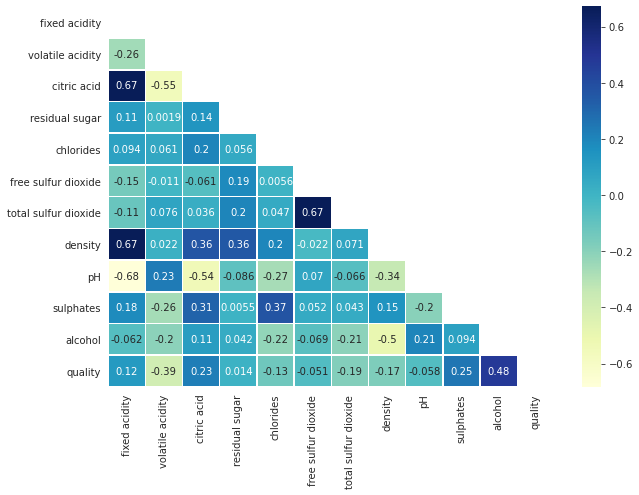

In [855]:
correlation = required_df.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 7))
    ax = sns.heatmap(correlation, mask=mask,linewidths = 0.5, annot = True, cmap="YlGnBu")


### pH vs Fixed Acidity

Text(0, 0.5, 'Fixed Acidity')

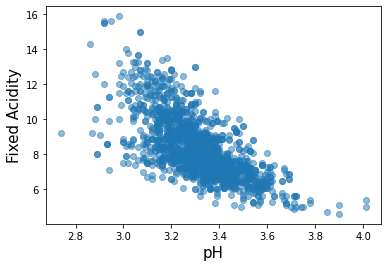

In [856]:
plt.scatter(ph,fixed_acidity, alpha = 0.5)
plt.xlabel('pH', fontsize = 15)
plt.ylabel('Fixed Acidity',fontsize = 15 )


As pH increases, Fixed Acidity of the wine reduces.

### Fixed Acidity vs Density

Text(0, 0.5, 'Fixed Acidity')

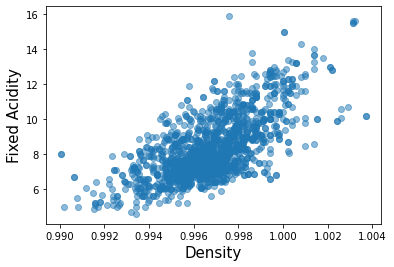

In [857]:
plt.scatter(density,fixed_acidity,alpha = 0.5)
plt.xlabel('Density', fontsize = 15)
plt.ylabel('Fixed Acidity',fontsize = 15 )


As density increases, Fixed Acidity of the wine increases

### Residual Sugar vs Chlorides

Text(0, 0.5, 'Chlorides')

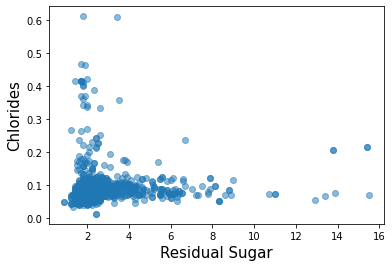

In [858]:
plt.scatter(residual_sugar,chlorides, alpha = 0.5)
plt.xlabel('Residual Sugar', fontsize = 15)
plt.ylabel('Chlorides',fontsize = 15)


The amount of residual sugar and chloride are independent of eachother.

### Citric Acid vs pH

Text(0, 0.5, 'Chlorides')

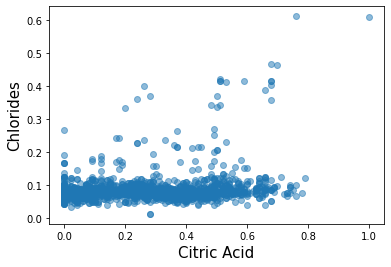

In [859]:
plt.scatter(citric_acid,chlorides, alpha = 0.5)
plt.xlabel('Citric Acid', fontsize = 15)
plt.ylabel('Chlorides',fontsize = 15 )


The amount of citric acid and chlorides are independent of eachother

### Density vs Alcohol

Text(0, 0.5, 'Fixed Acidity')

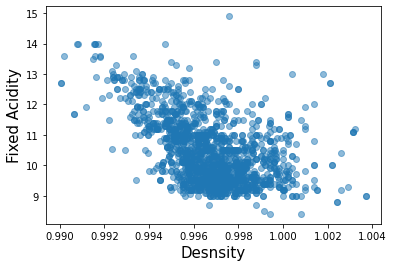

In [860]:
plt.scatter(density,alcohol, alpha = 0.5)
plt.xlabel('Desnsity', fontsize = 15)
plt.ylabel('Fixed Acidity',fontsize = 15 )


As density increases, the alochol content decreases.

## Modelling

In [861]:
correlation["quality"].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

<p> We can notice that  <b>alcohol,sulphates,citric acid and volatile acidity</b> have the highest correlation coefficients  with our target vairable. These will be considered as <u> feature variables </u> for further analysis</p>

#### Removing outliers using Z Score

In [862]:
required_df = required_df[(z < 3).all(axis=1)]
required_df.shape


(1451, 12)

In [863]:
bins = (2,6.5,8)
labels = ['bad','good']
required_df['quality'] = pd.cut(required_df['quality'],bins=bins,labels=labels)

In [864]:
le = LabelEncoder()
required_df['quality'] = le.fit_transform(required_df['quality'])
required_df['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1451, dtype: int64

In [865]:
X = np.asarray(required_df.loc[:,["alcohol","pH","citric acid","volatile acidity"]])
X

array([[ 9.4  ,  3.51 ,  0.   ,  0.7  ],
       [ 9.8  ,  3.2  ,  0.   ,  0.88 ],
       [ 9.8  ,  3.26 ,  0.04 ,  0.76 ],
       ...,
       [11.   ,  3.42 ,  0.13 ,  0.51 ],
       [10.2  ,  3.57 ,  0.12 ,  0.645],
       [11.   ,  3.39 ,  0.47 ,  0.31 ]])

In [866]:
y = np.asarray(required_df["quality"])
y

array([0, 0, 0, ..., 0, 0, 0])

### Standardizing the dataset

In [867]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

### Splitting the DataSet

In [868]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify = y)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (1160, 4) (1160,)
Test set: (291, 4) (291,)


### Applying Knn Classification

[0.8138639584317431, 0.8463013698630139, 0.8373358526216345, 0.8538828530940009, 0.8449173358526216, 0.8593953708077468, 0.8552668871043931, 0.8566509211147851, 0.8545819555975436, 0.8662966461974493, 0.8594000944733112, 0.870434577231932, 0.8656164383561645, 0.866995748700992, 0.866995748700992, 0.863547472838923, 0.8628578176665093, 0.8662966461974493, 0.8676759565422769, 0.8662966461974492, 0.8683656117146906, 0.8662966461974493, 0.8690552668871044, 0.8683656117146906, 0.8669863013698629]


Text(0, 0.5, 'Cross-validated accuracy')

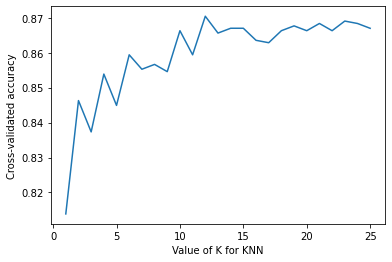

In [869]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_range = range(1, 26)
k_scores = []
# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') 
    k_scores.append(scores.mean())
# Plot accuracy for every k number between 1 and 26
print(k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

So, we will be taking k = 13.

In [870]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)

KNearest neighbors  with k  = 20, accuracy score:  0.872852233676976
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       251
           1       0.58      0.28      0.37        40

    accuracy                           0.87       291
   macro avg       0.74      0.62      0.65       291
weighted avg       0.85      0.87      0.85       291



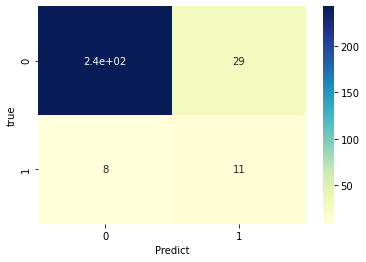

In [871]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

knn_confusionmatrix = confusion_matrix(knn_pred,y_test)
ax = sns.heatmap(knn_confusionmatrix,annot=True,cmap="YlGnBu",)
ax.set(xlabel='Predict', ylabel='true')
knn_accuracyscore = accuracy_score(knn_pred,y_test)
print("KNearest neighbors  with k  = 20, accuracy score: ",knn_accuracyscore,)
print(classification_report(y_test,knn_pred))

### Applying Logistic Regression

In [872]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (1015, 4) (1015,)
Test set: (436, 4) (436,)


In [874]:
from sklearn.linear_model import LogisticRegression

l = LogisticRegression()
log_reg = l.fit(X_train,y_train)
logreg_pred = log_reg.predict(X_test)
logreg_accuracyscore = accuracy_score(logreg_pred,y_test)
print("Logistic Regression, accuracy score = ",logreg_accuracyscore)
print(classification_report(y_test,logreg_pred))

Logistic Regression, accuracy score =  0.8577981651376146
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       373
           1       0.52      0.24      0.33        63

    accuracy                           0.86       436
   macro avg       0.70      0.60      0.62       436
weighted avg       0.83      0.86      0.83       436



# Knn with k = 13 beats Logistic Regression in terms of accuracy for the given data set.